# Import library and sorce codes

## Import library

In [1]:
import pandas as pd
from pymatgen import core
from sklearn.preprocessing import StandardScaler
import torch
import numpy as np
import matplotlib.pyplot as plt


## Import sorce codes

In [2]:
import src.preprocess_func as preprocess
import src.model as model
import src.plotting as plotting
import src.variable_generator as vg

# Preprocess data

In [3]:
# Import files
filename = 'srf/SM_FT_dataset.csv'
df = pd.read_csv(filename,index_col=0)

comps = [core.Composition(x) for x in df['Composition']]
dset = preprocess.data_generator(comps)

# X_train data
Training_sequences = dset.real_data
# features' labels
Elements_sequences = dset.elements #input elements sequence

# Y_train data
properties_values = df.iloc[:,1:].values.astype('float32') # Y_train
scaler = StandardScaler() # sklearn Standard_scaler
properties_values_scaled = scaler.fit_transform(properties_values) # Scaled Y_train

# Import models

## surrogate_model

In [4]:
surrogate_model = model.ANN()
surrogate_model.load_dict()

## cAE

In [5]:
cAE = model.cAE()
cAE.load_dict()

## cVAE

In [6]:
cVAE = model.cVAE()
cVAE.load_dict()

## WcGAN

In [7]:
WcGAN = model.WcGAN()
WcGAN.load_dict(load_dir="Trained_models/WcGAN.pt")

# Import old models

In [8]:
# surrogate_model = torch.load("Trained_models/ANN.pth")
# cAE = torch.load("Trained_models/cAE.pth")
# cVAE = torch.load("Trained_models/cVAE.pth")
# WcGAN = training.WcGAN(dset,properties_values_scaled,surrogate_model,"Trained_models/WcGAN_2.pt")

# Setup variable generator

## cAE

In [8]:
vg_cAE = vg.AE_variable_generator(AE_model=cAE,
training_sequences=Training_sequences,
properties_values=properties_values,
properties_values_scaled=properties_values_scaled,
scaler=scaler,
surrogate_model=surrogate_model,
model_name="cAE",
latent_dim=5)

## cVAE

In [9]:
vg_cVAE = vg.AE_variable_generator(AE_model=cVAE,
training_sequences=Training_sequences,
properties_values=properties_values,
properties_values_scaled=properties_values_scaled,
scaler=scaler,
surrogate_model=surrogate_model,
model_name="cVAE",
latent_dim=5)

## WcGAN

In [10]:
vg_GAN = vg.WcGAN_variable_generator(GAN_model=WcGAN,
training_sequences=Training_sequences,
properties_values=properties_values,
properties_values_scaled=properties_values_scaled,
scaler=scaler,
surrogate_model=surrogate_model,
latent_dim=10)

# Plot

## Input dataset

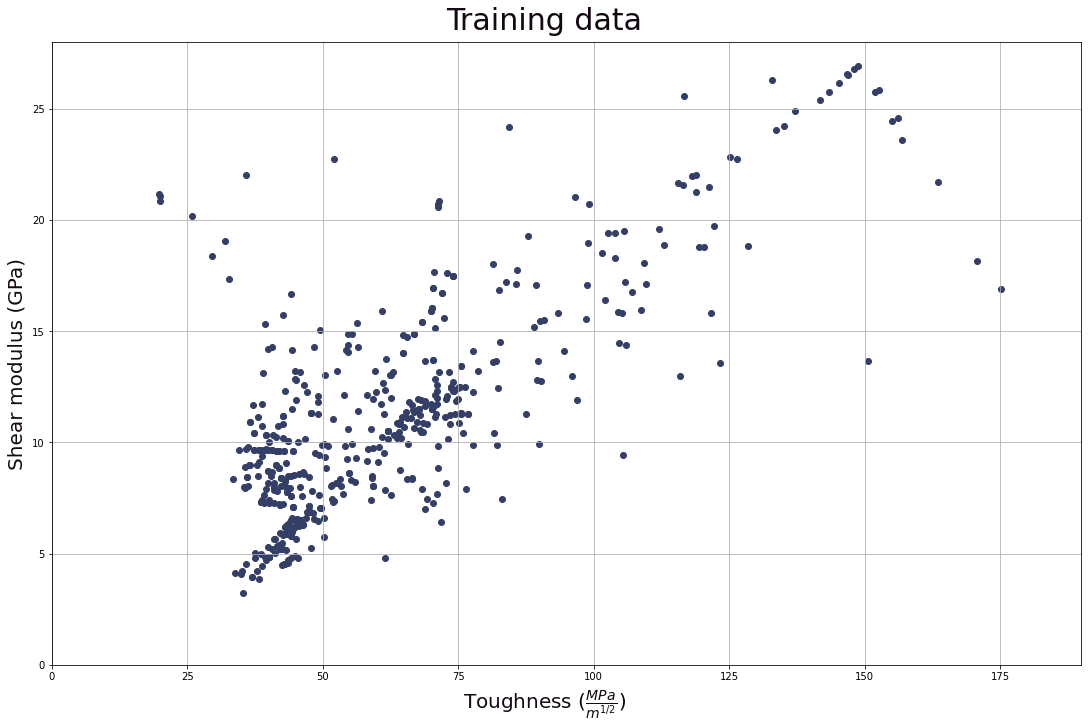

In [11]:
scatter_plot = plotting.input_scatter_plot(properties_values)

## Plot few samples from dataset

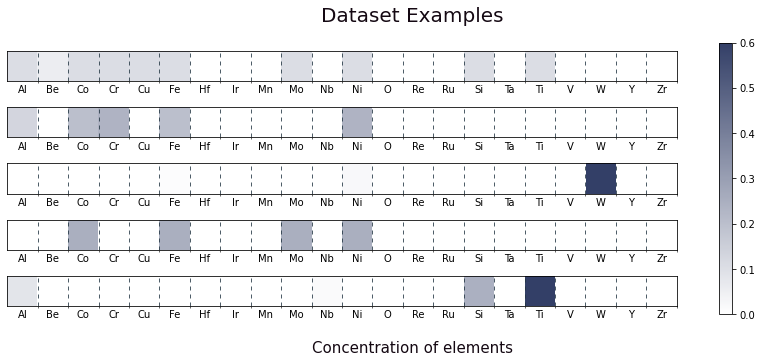

In [12]:
dis_plot = plotting.sample_plot(Training_sequences,dset,interval=10,title="Dataset Examples")

## latent space comparision (cAE vs cVAE)

### cAE

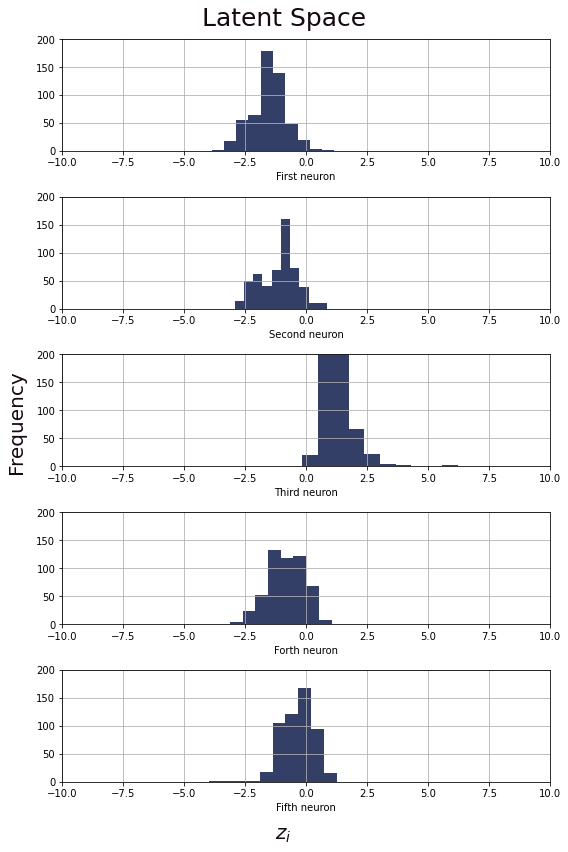

In [15]:
latent_plot_cAE=plotting.latent_code_variance(vg_cAE.latent_code)

### cVAE

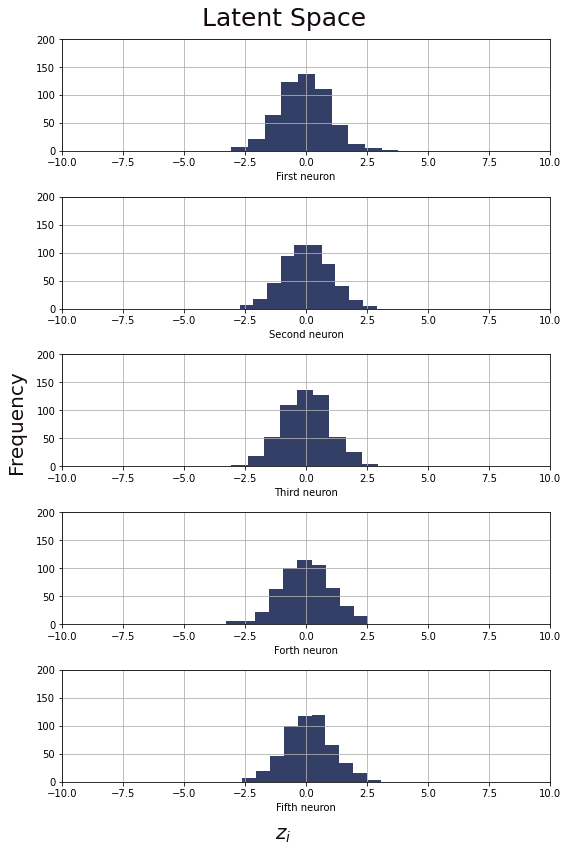

In [16]:
latent_plot_cVAE=plotting.latent_code_variance(vg_cVAE.latent_code)

## Mapping plots (cAE vs cVAE vs WcGAN)

### cAE

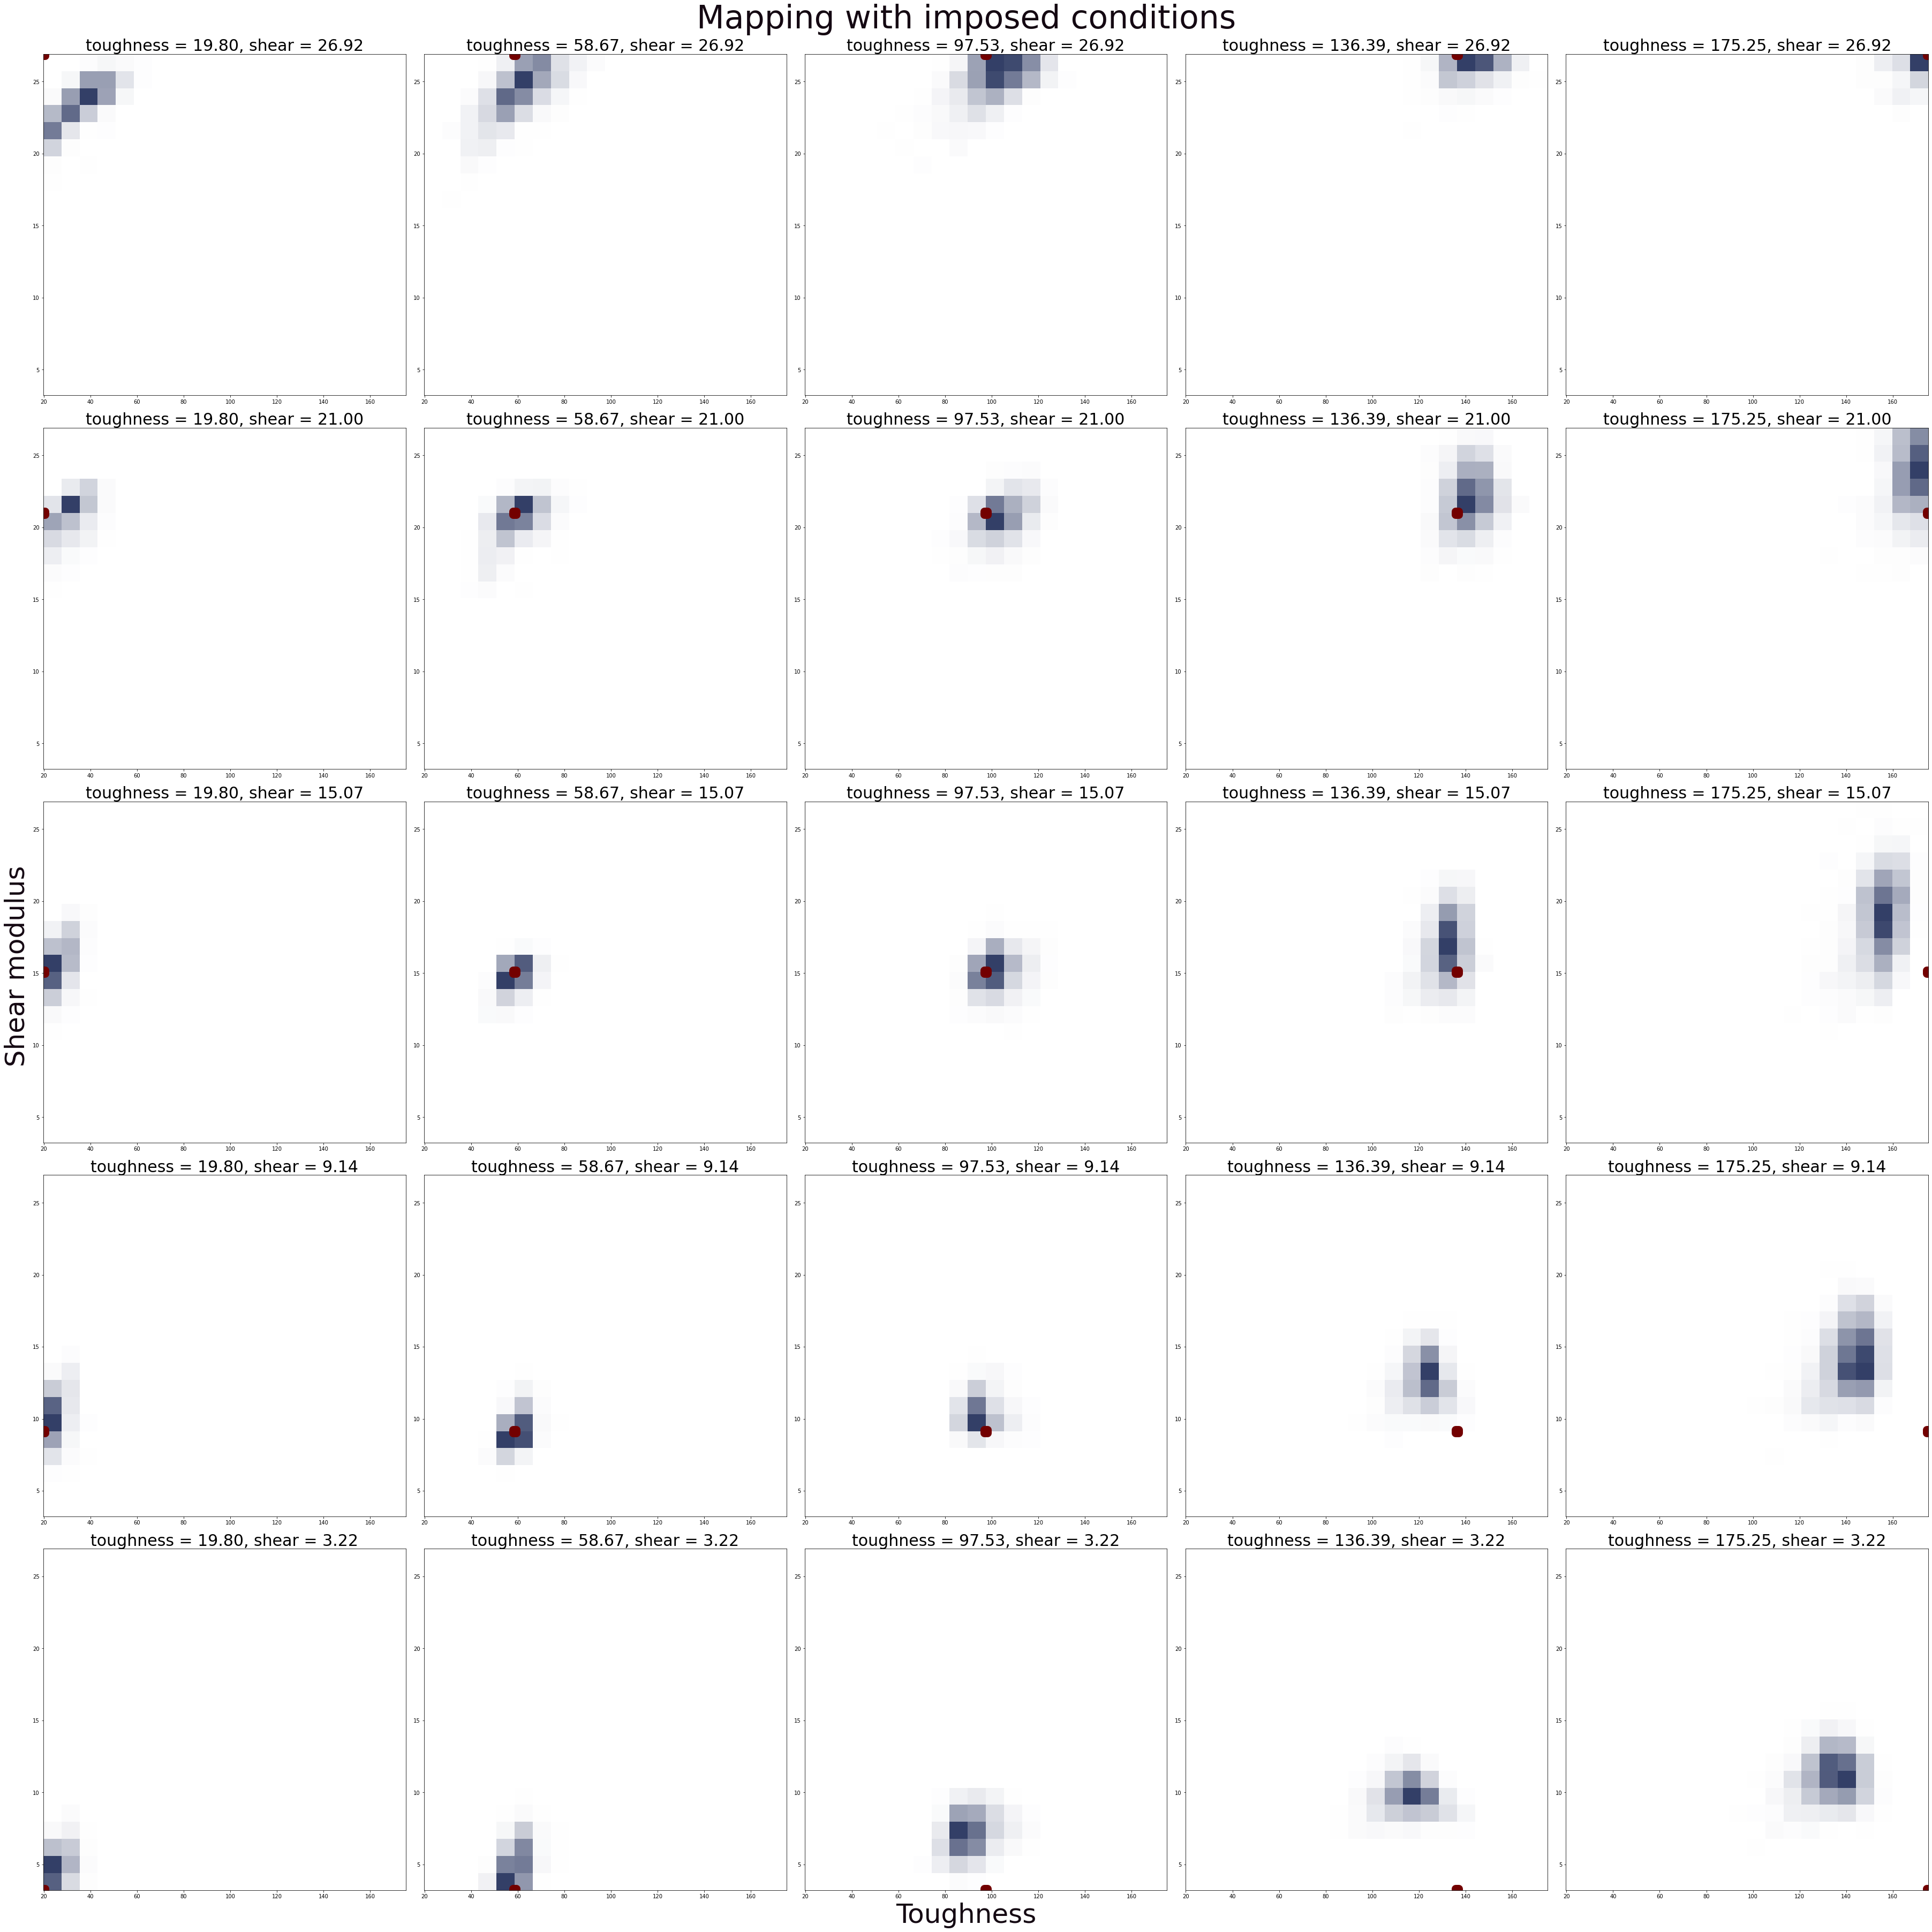

In [17]:
M_cAE_data,M_cAE_conds = vg_cAE.preprocess_mapping()
M_cAE =  plotting.variance_map(M_cAE_data,M_cAE_conds)

### cVAE

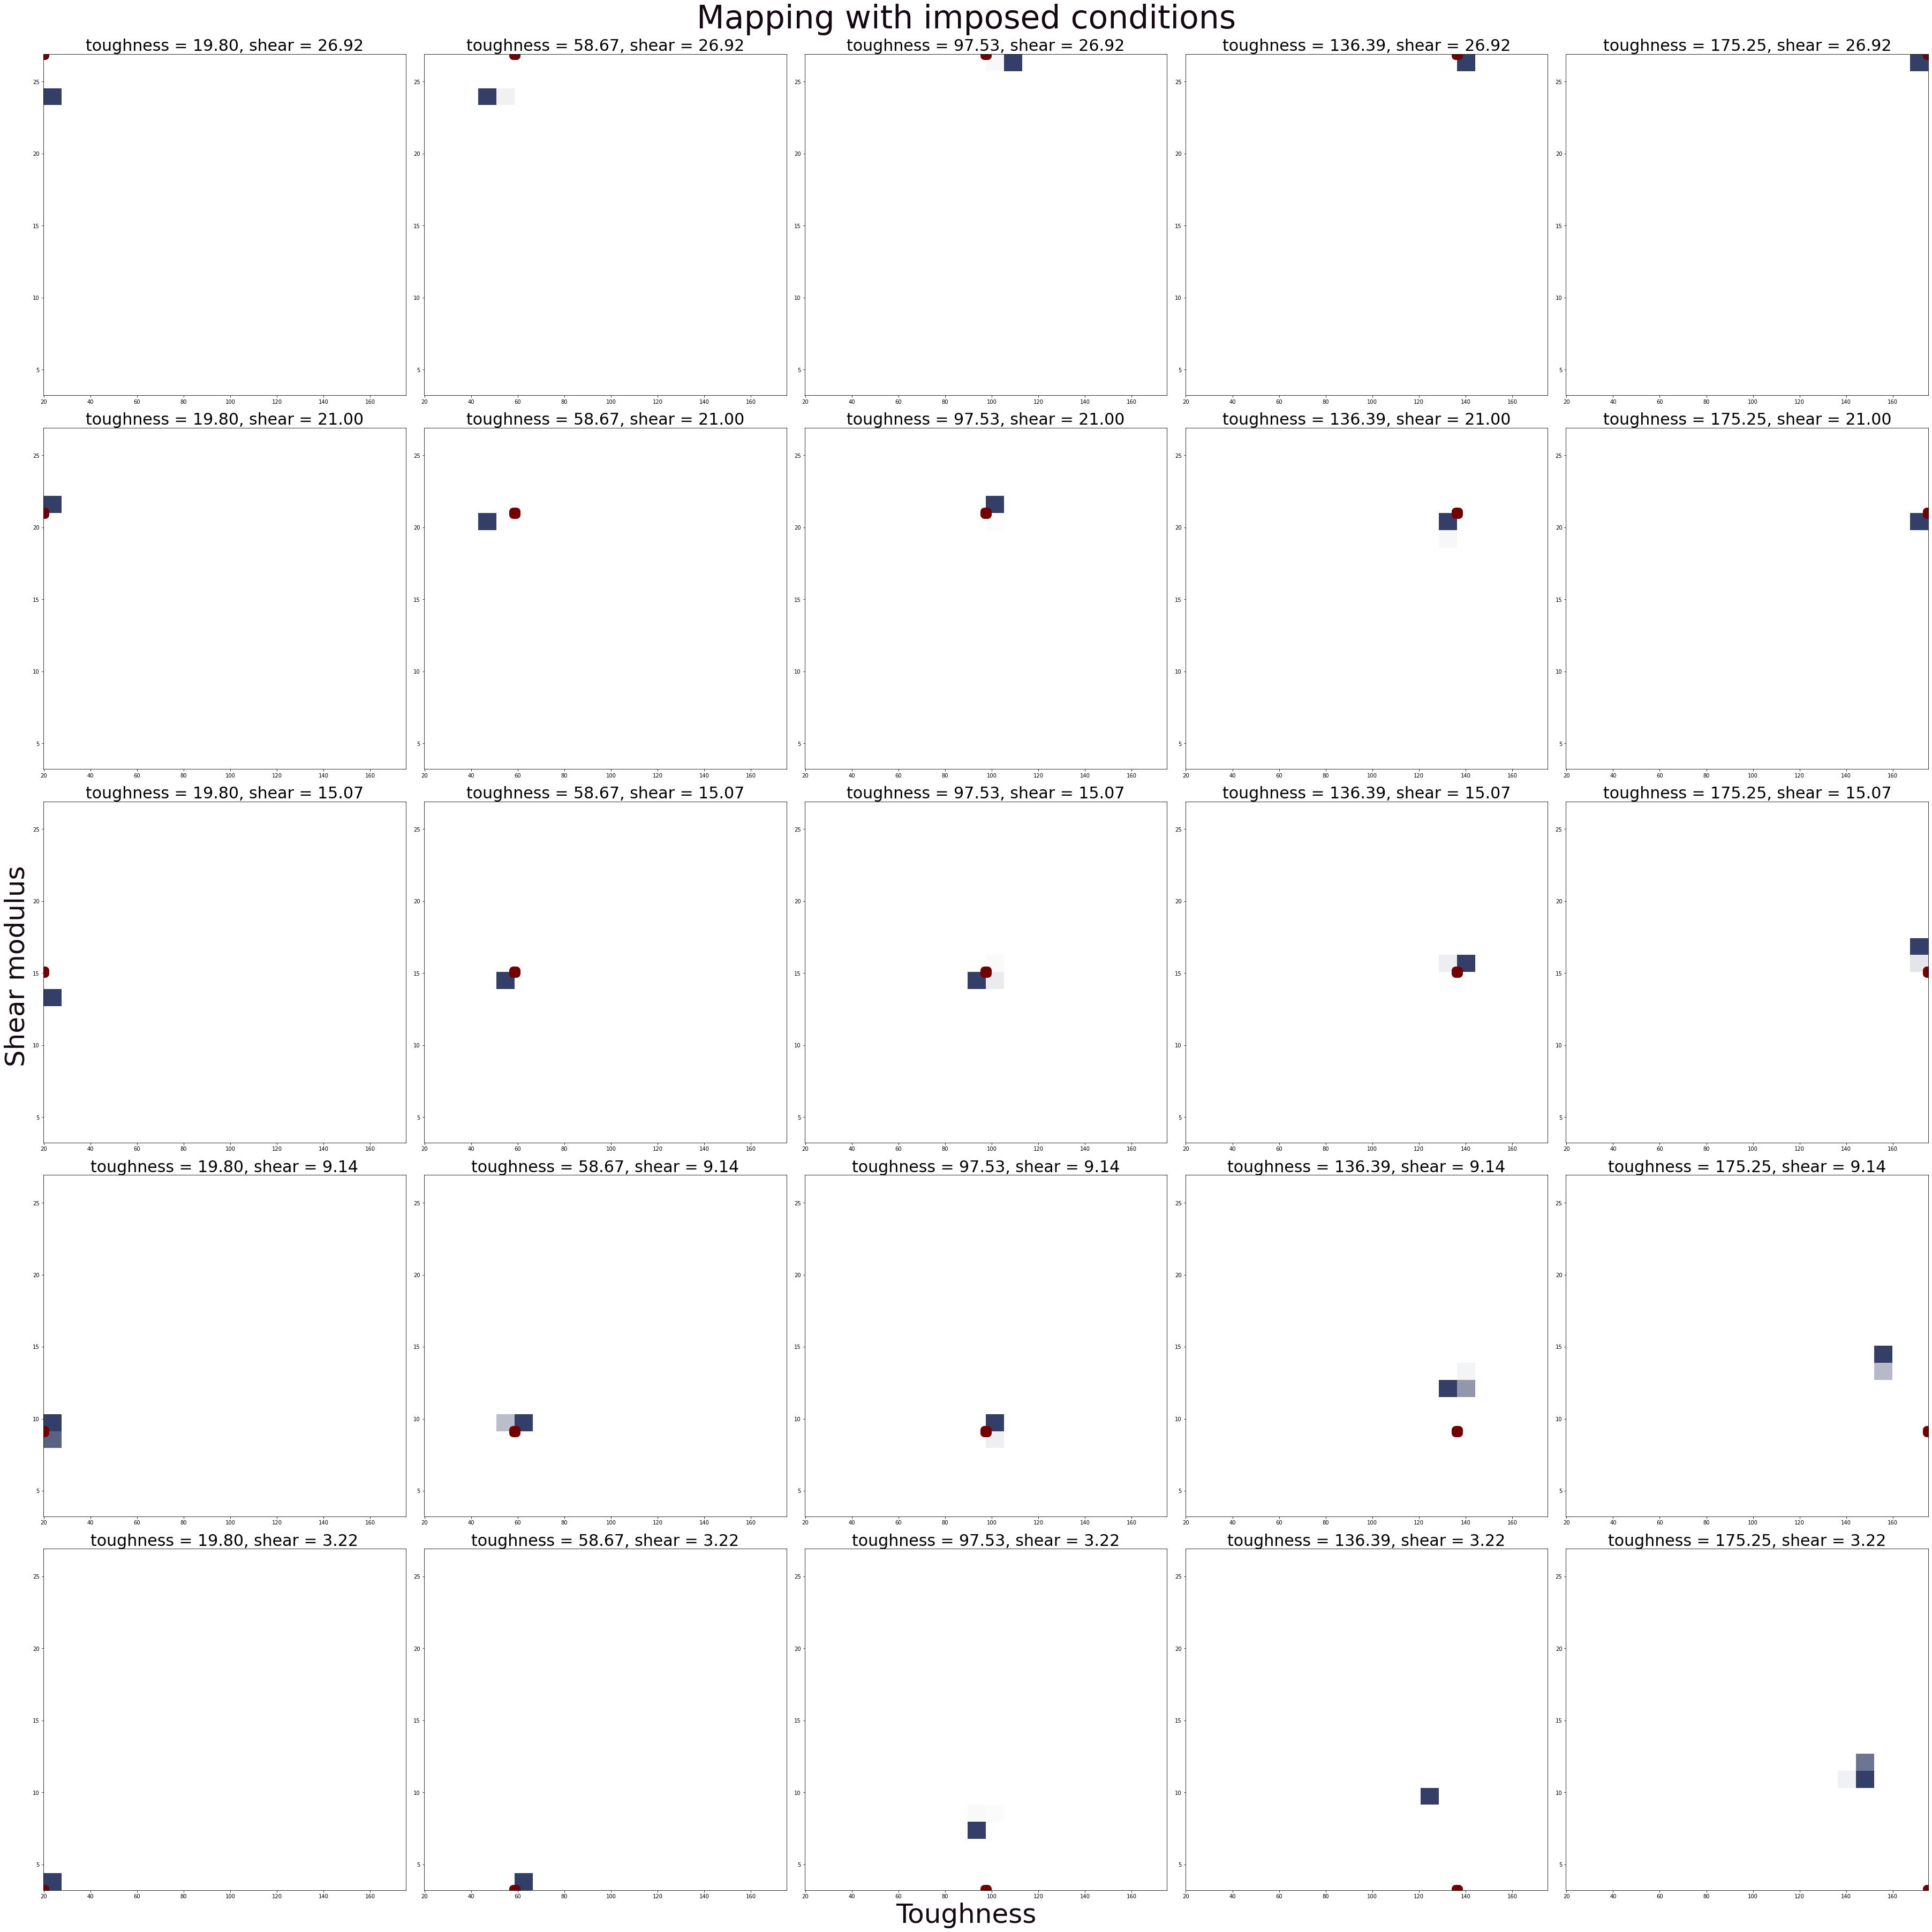

In [18]:
M_cVAE_data,M_cVAE_conds = vg_cVAE.preprocess_mapping()
M_cVAE =  plotting.variance_map(M_cVAE_data,M_cVAE_conds)

### WcGAN

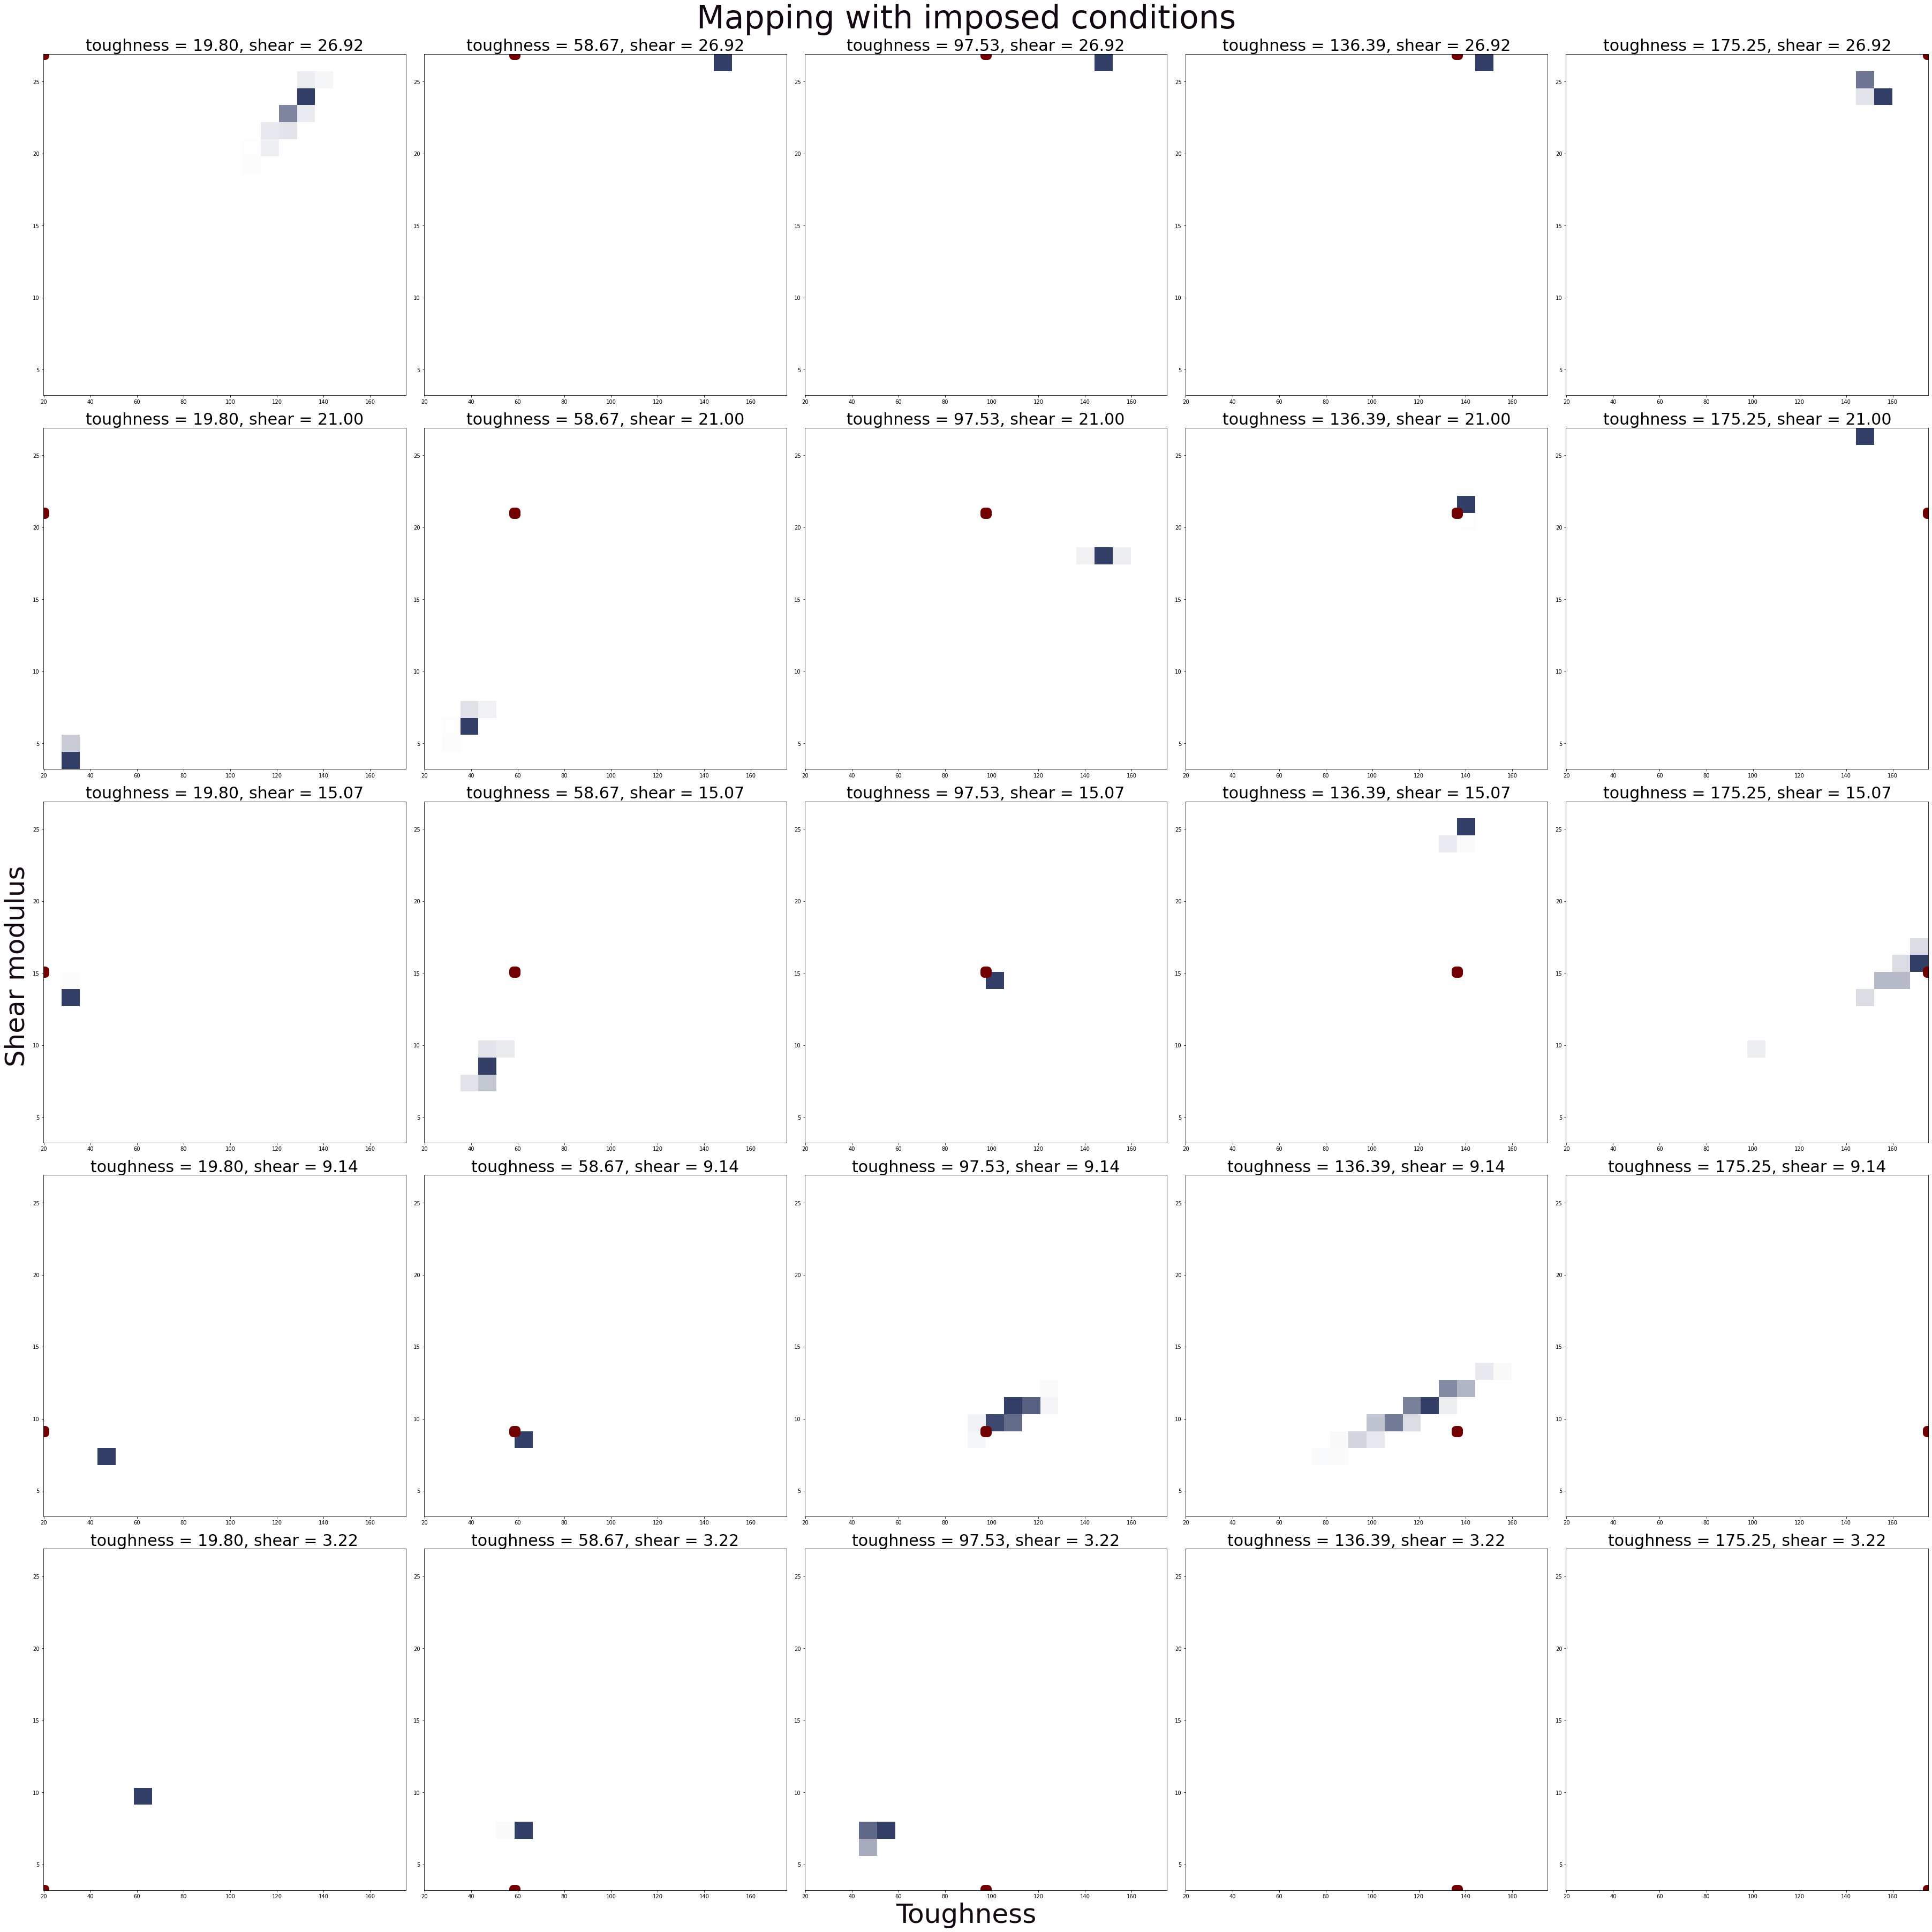

In [19]:
M_GAN_data,M_GAN_conds = vg_GAN.preprocess_mapping()
M_GAN = plotting.variance_map(M_GAN_data,M_GAN_conds)

## Parioty plots (cAE vs cVAE vs WcGAN)

## Fetch 20 sets of conditions as input along the red line

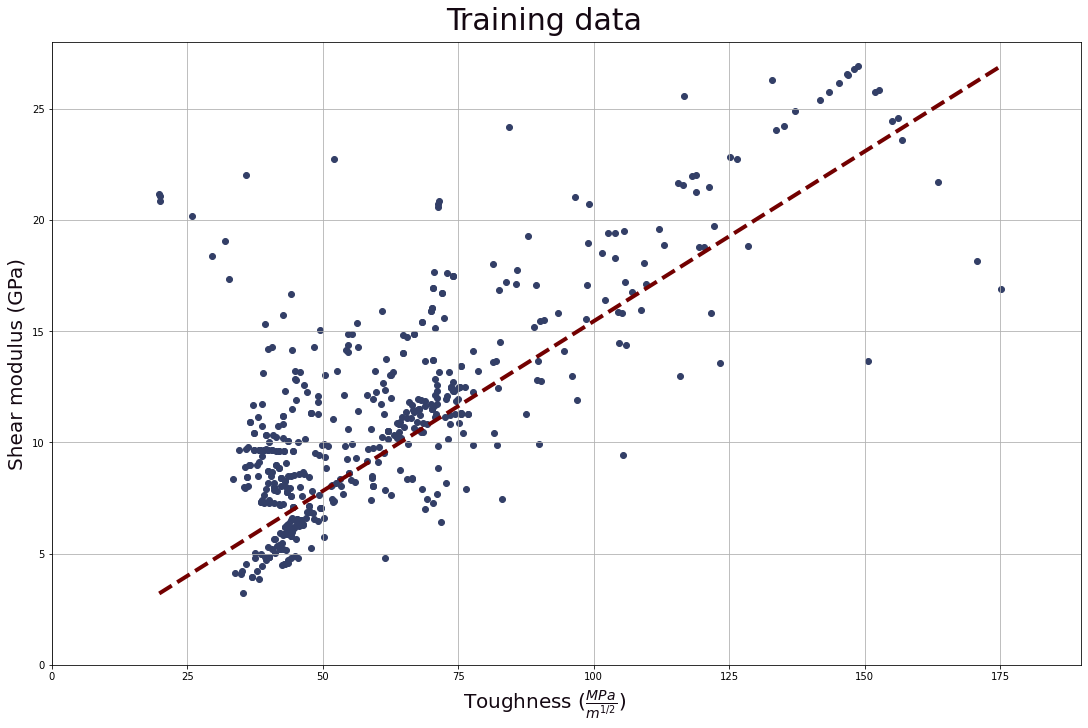

In [18]:
Slice_plot = plotting.input_scatter_plot_slice(properties_values)

### cAE

In [9]:
V_cAE_data,V_cAE_conds,V_cAE_recipes = vg_cAE.preprocess_violinplot()
V_cAE = plotting.violin_plot(V_cAE_data,V_cAE_conds)

### cVAE

In [20]:
V_cVAE_data,V_cVAE_conds,V_cVAE_recipes = vg_cVAE.preprocess_violinplot()
V_cVAE = plotting.violin_plot(V_cVAE_data,V_cVAE_conds)

### WcGAN

In [21]:
V_GAN_data,V_GAN_conds,V_GAN_recipes = vg_GAN.preprocess_violinplot()
V_GAN = plotting.violin_plot(V_GAN_data,V_GAN_conds)

## MAPE comparison

### cAE

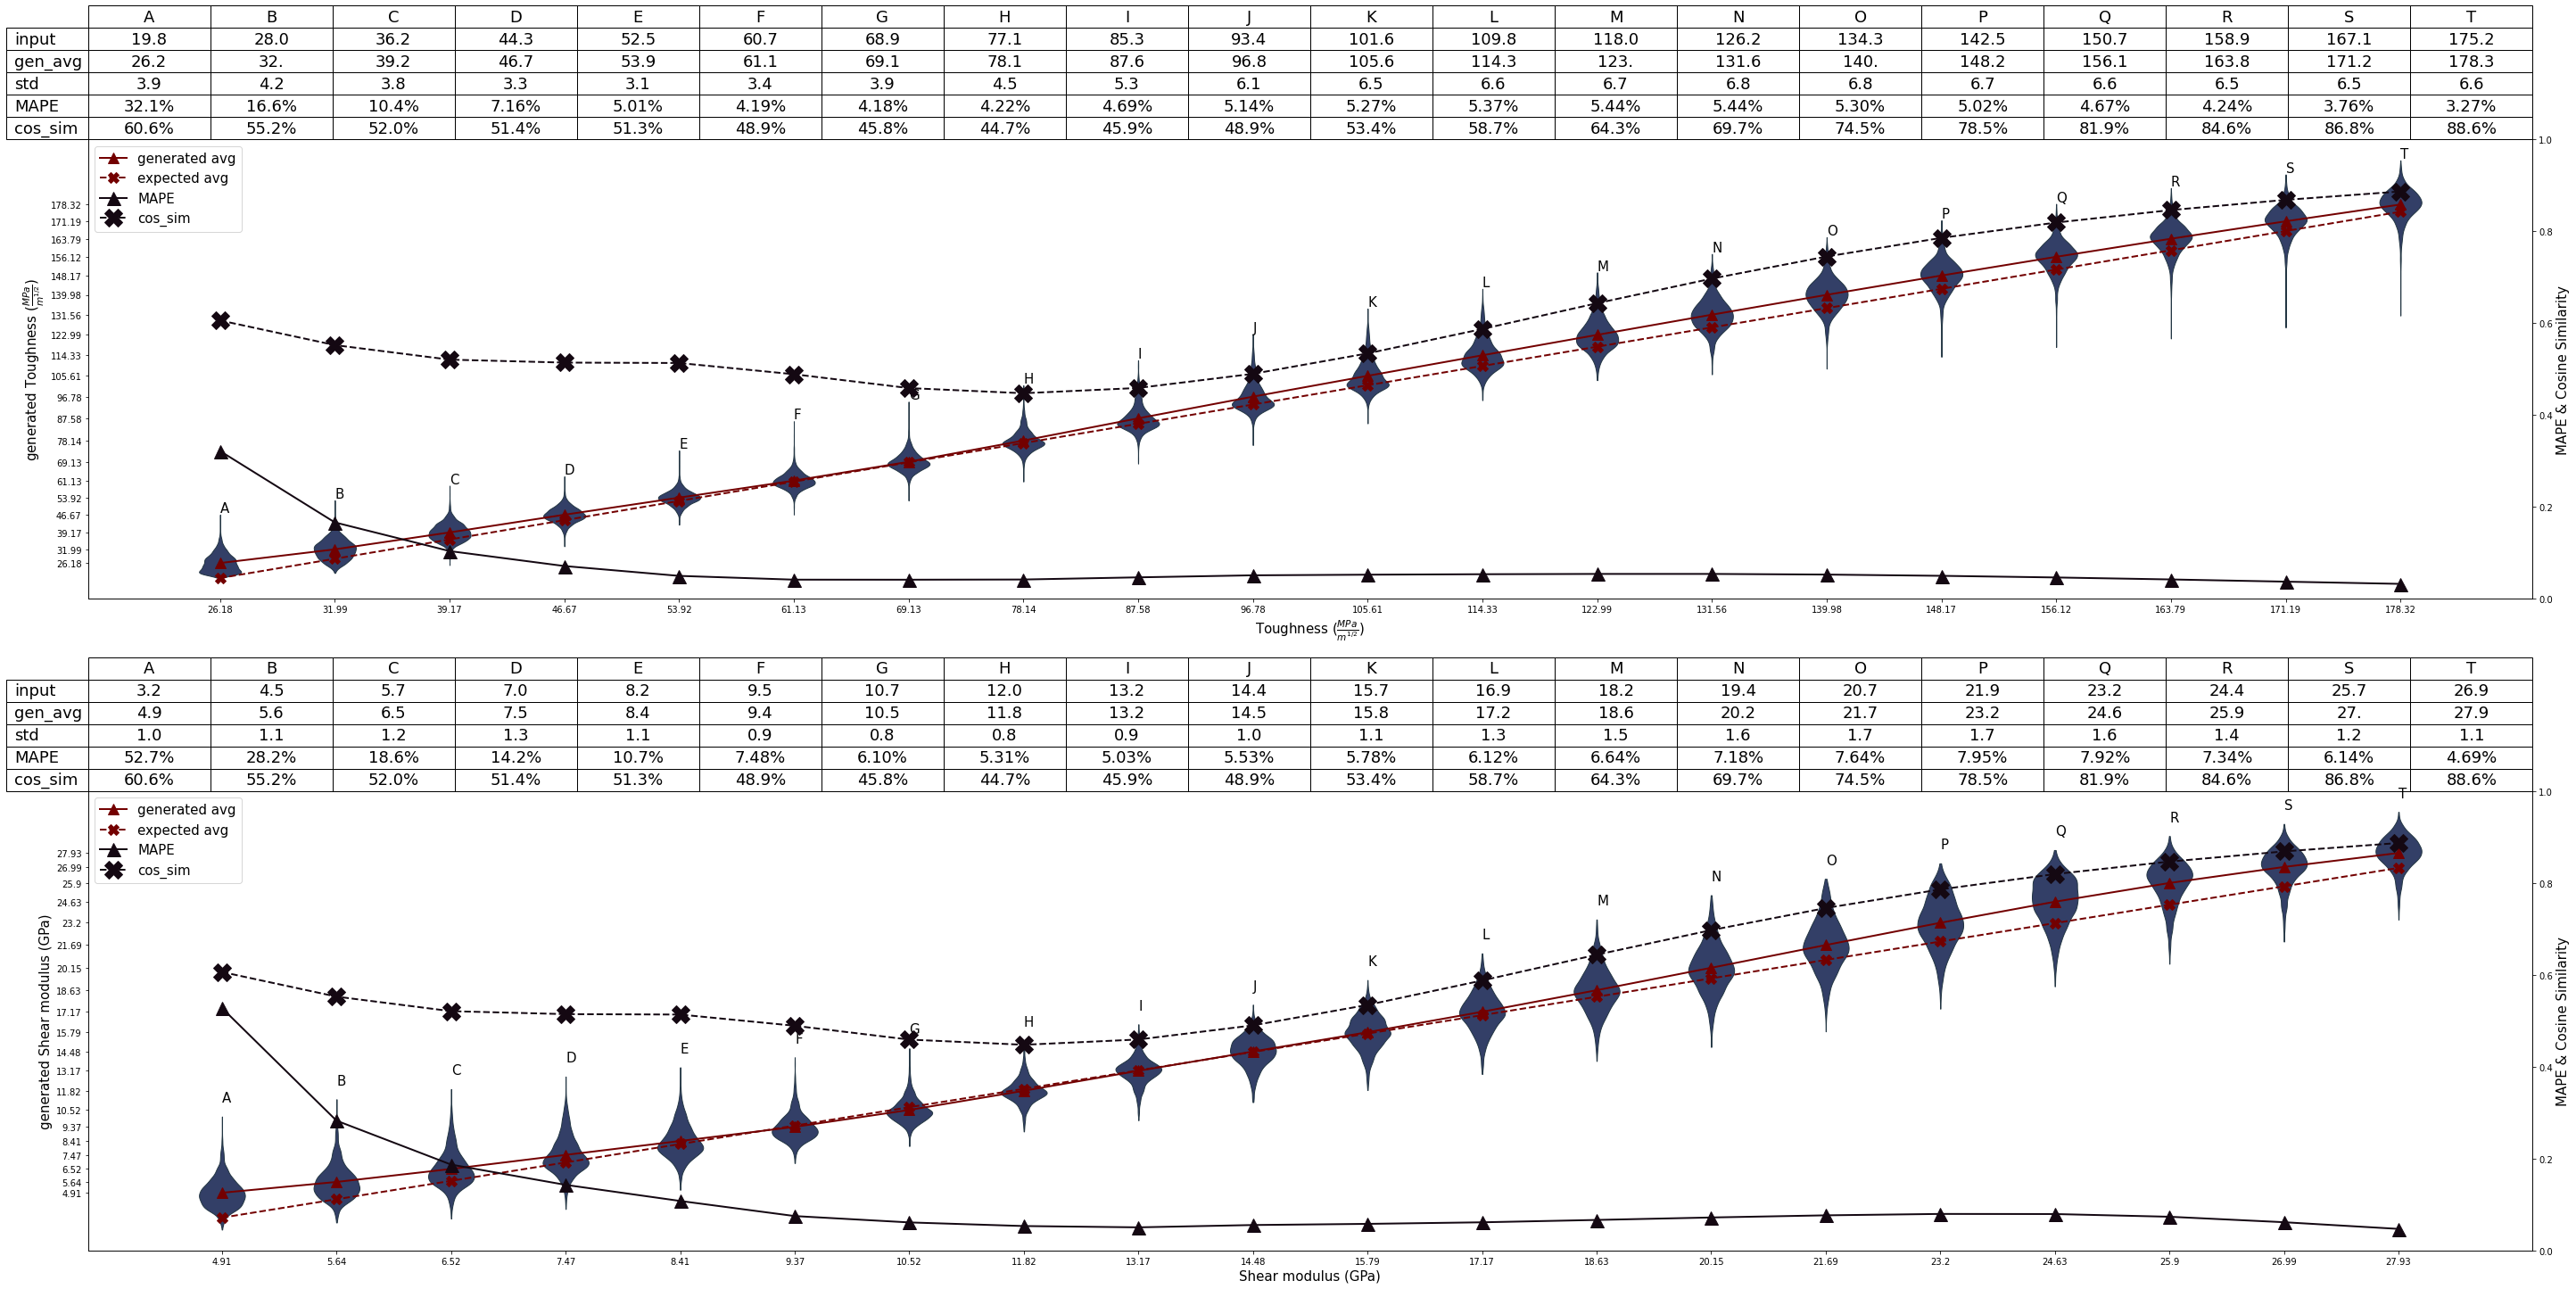

In [10]:
V_cAE_MAPE = plotting.violin_plot_with_MAPE(V_cAE_data,V_cAE_conds,V_cAE_recipes)

## cVAE

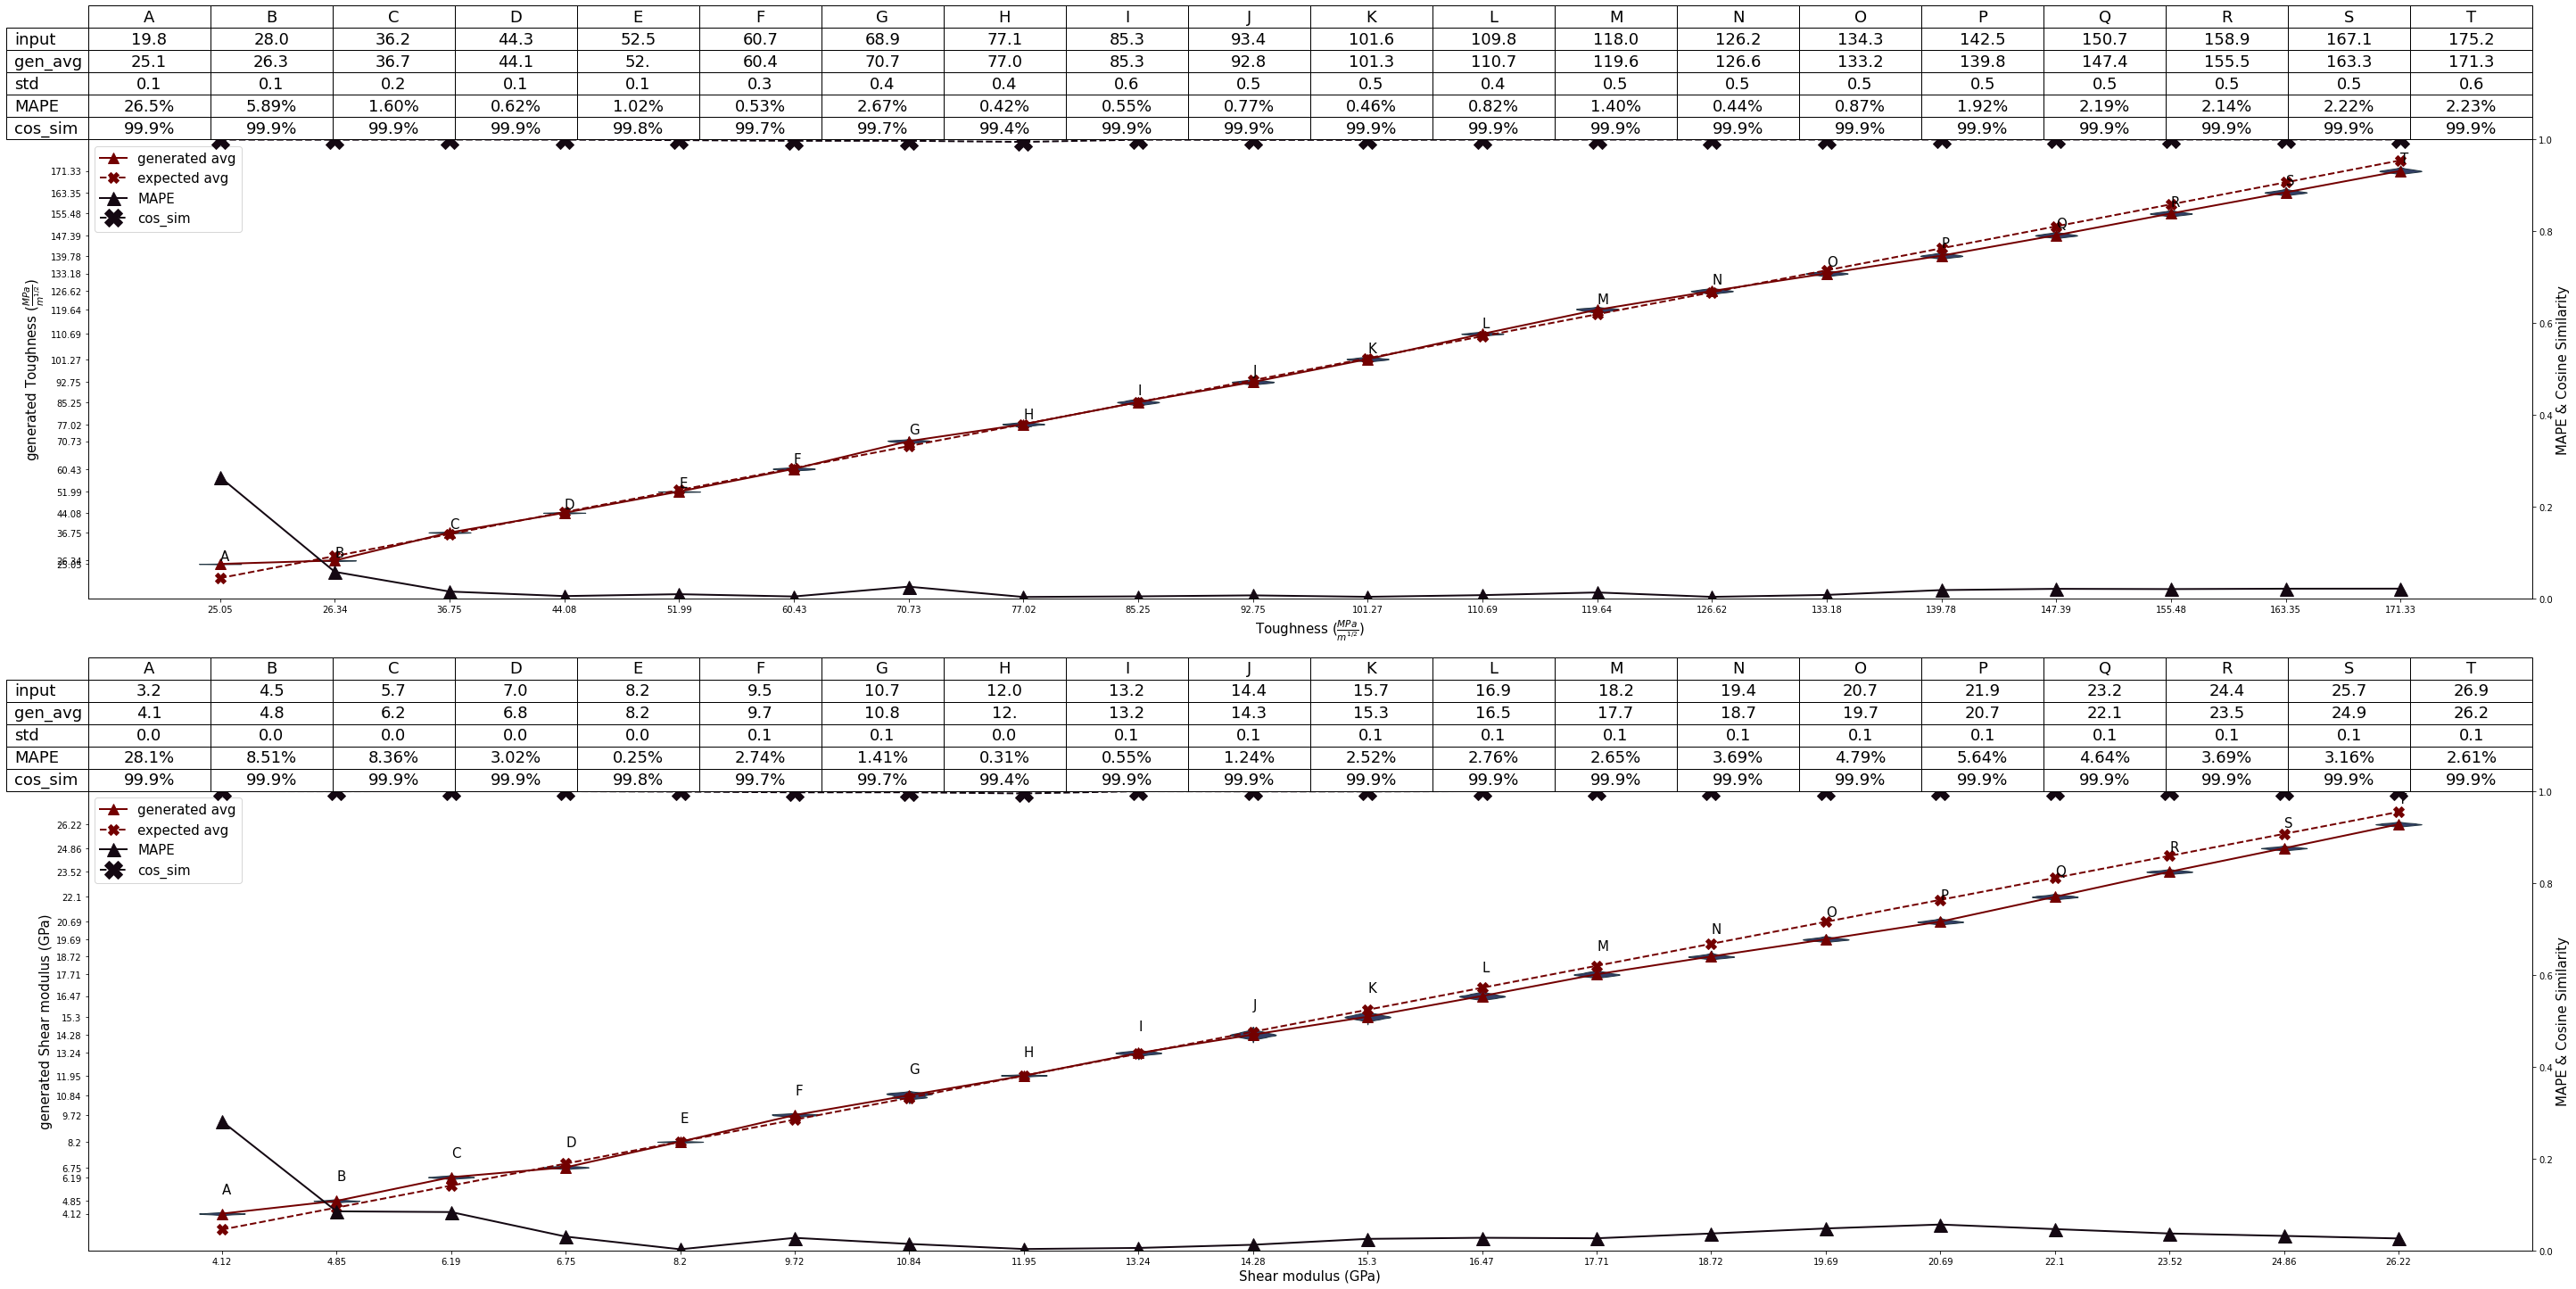

In [23]:
V_cVAE_MAPE = plotting.violin_plot_with_MAPE(V_cVAE_data,V_cVAE_conds,V_cVAE_recipes)

## WcGAN

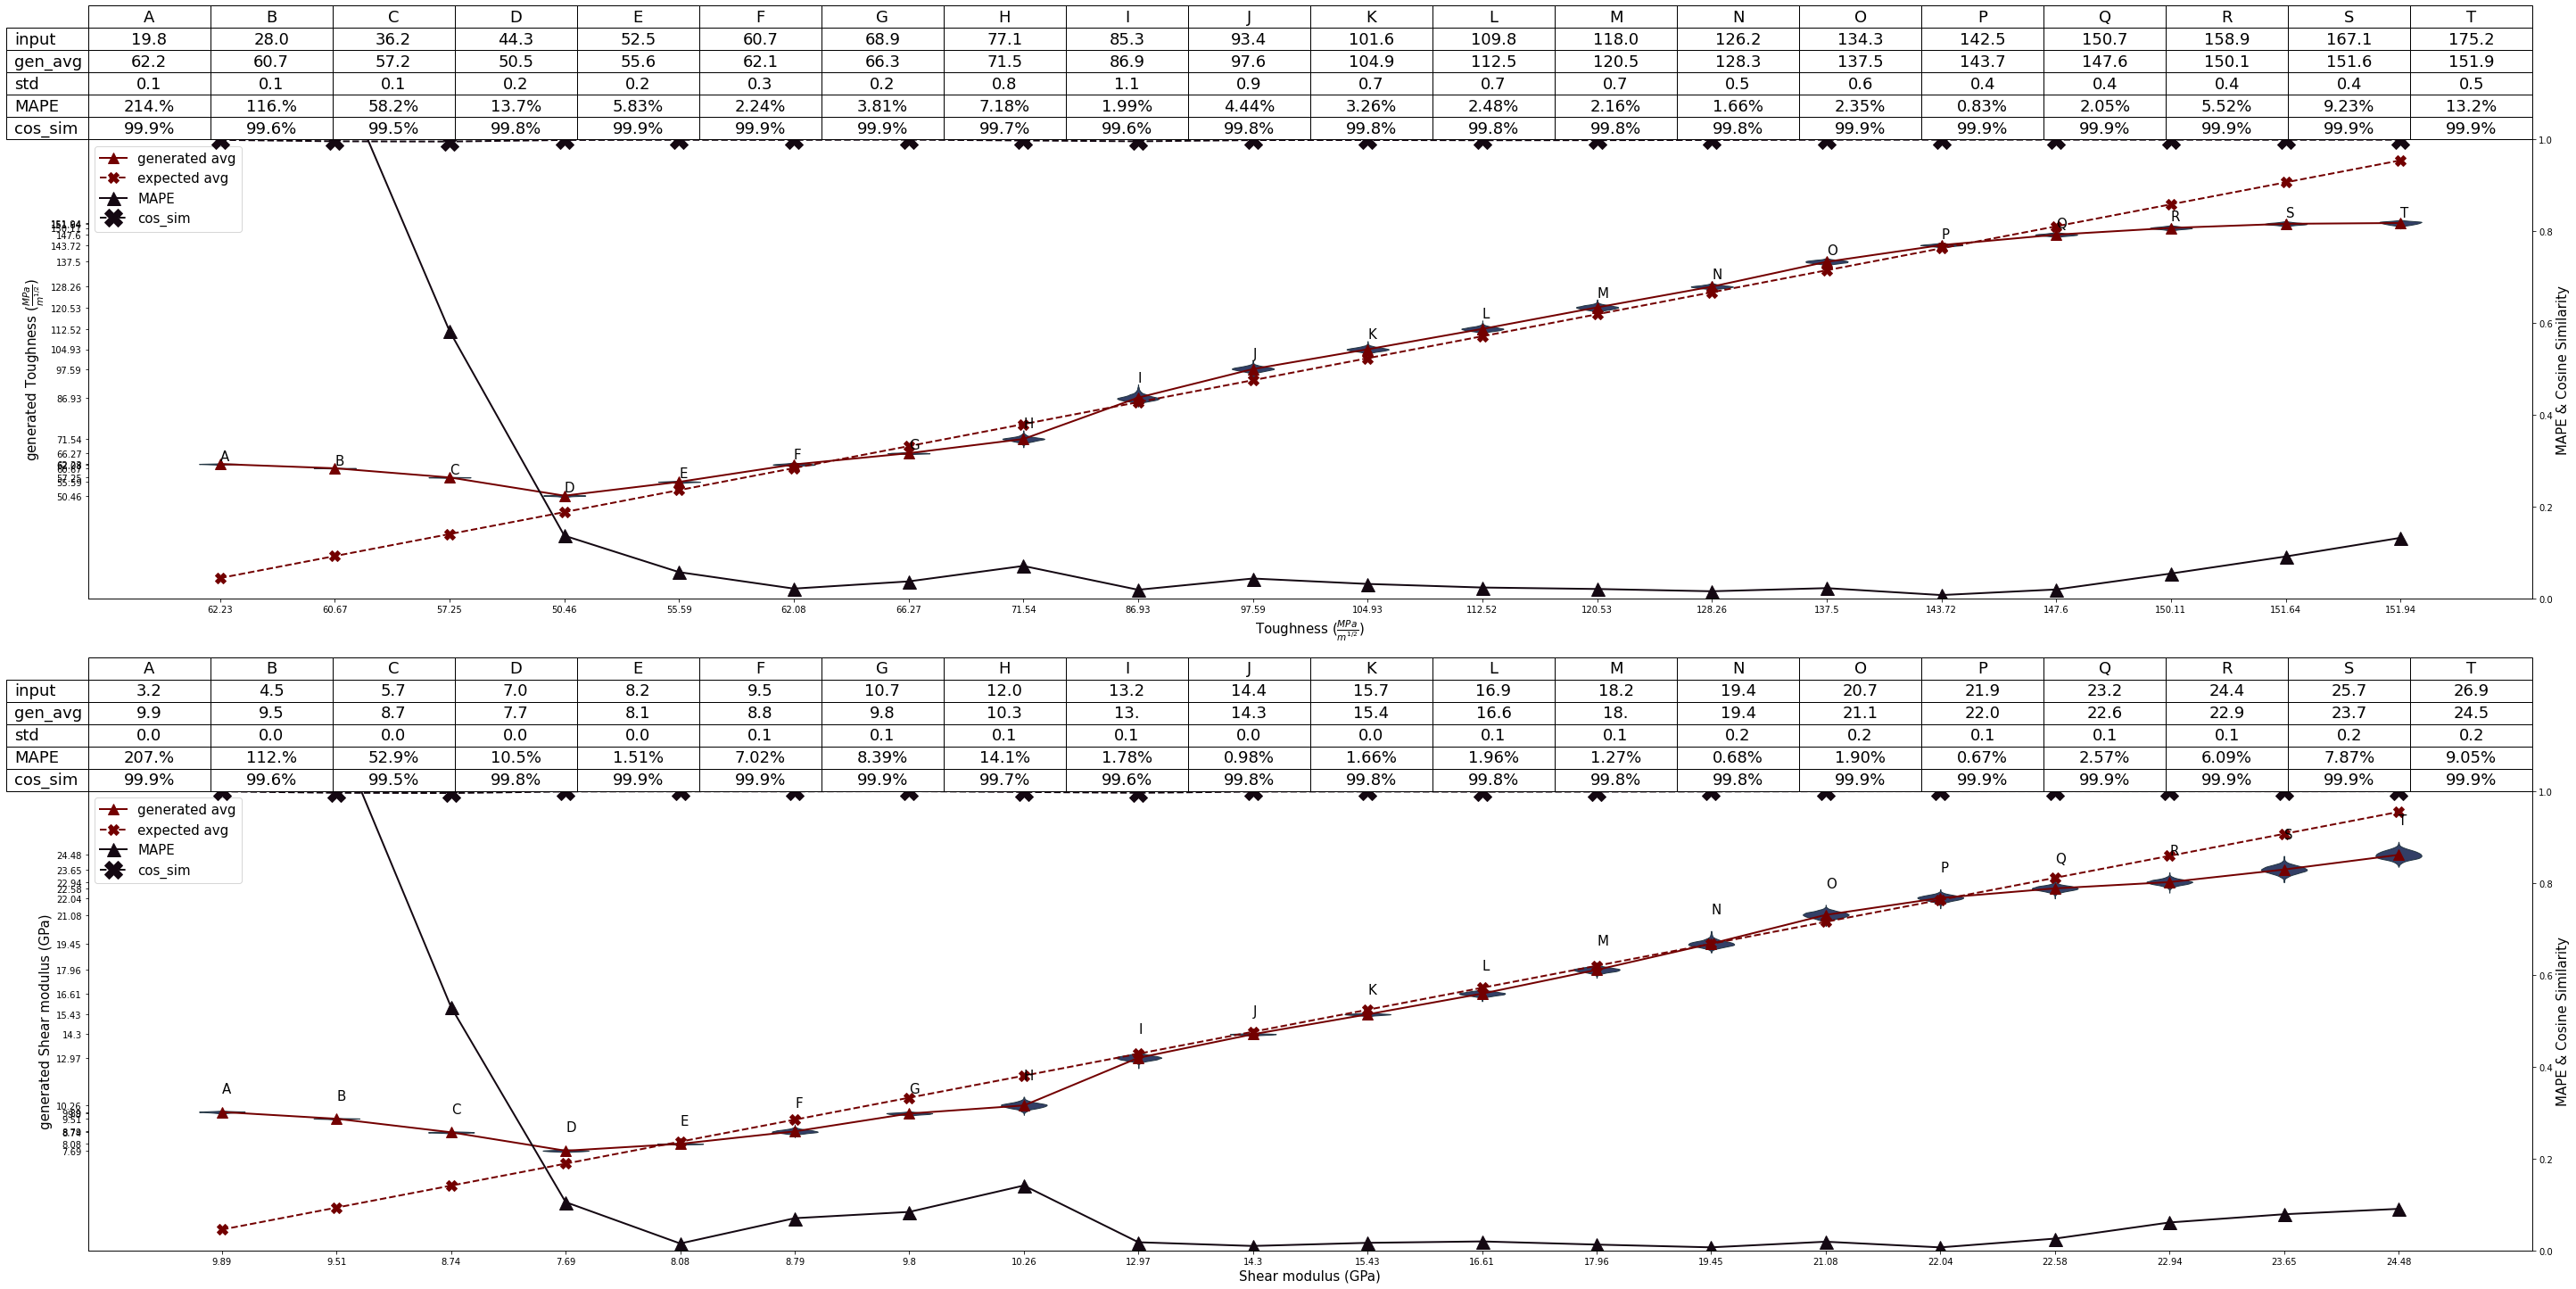

In [24]:
V_GAN_MAPE = plotting.violin_plot_with_MAPE(V_GAN_data,V_GAN_conds,V_GAN_recipes)

## Random samples

### cAE

[144.94823   24.625372]
[144.09068   22.914715]
[151.25308   20.367086]
[148.51472   23.598566]
[145.36324   20.501734]


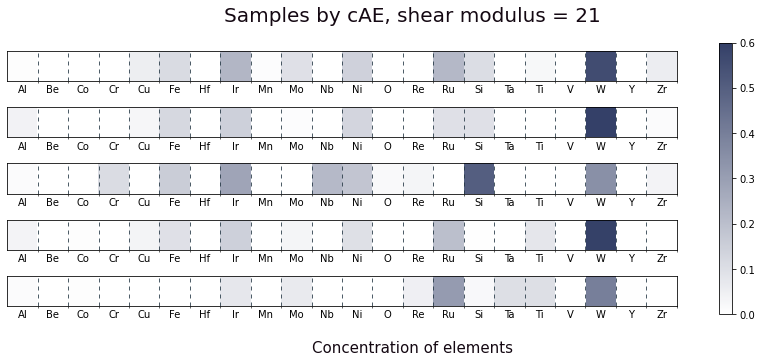

In [26]:
R_cAE_sample,R_cAE_conds = vg_cAE.AE_sampler(500,[136,21])
R_cAE_conds = scaler.inverse_transform(R_cAE_conds)
I = 50
R_cAE = plotting.sample_plot(R_cAE_sample,dset,title = "Samples by cAE, shear modulus = 21",interval = I)
for i in range(5):
    print(R_cAE_conds[0+i*I])

### cVAE

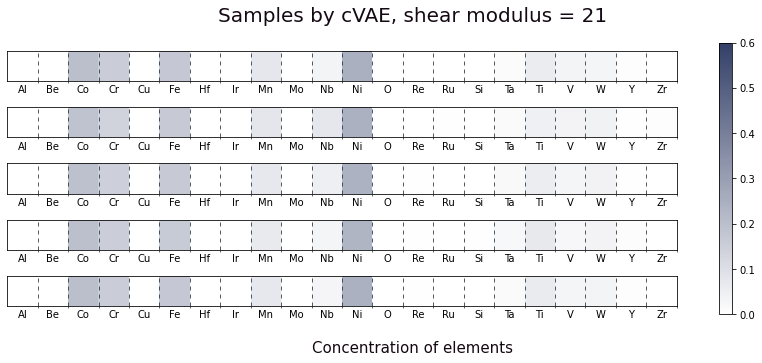

In [27]:
R_cVAE_sample,R_cVAE_conds = vg_cVAE.AE_sampler(500,[75.52,11.33])
R_cVAE = plotting.sample_plot(R_cVAE_sample,dset,title = "Samples by cVAE, shear modulus = 21",interval = 10)

### WcGAN

[47.2026     7.4595633]
[46.97148   7.434112]
[47.02189    7.3876276]
[47.06859   7.448692]
[47.166836  7.455222]


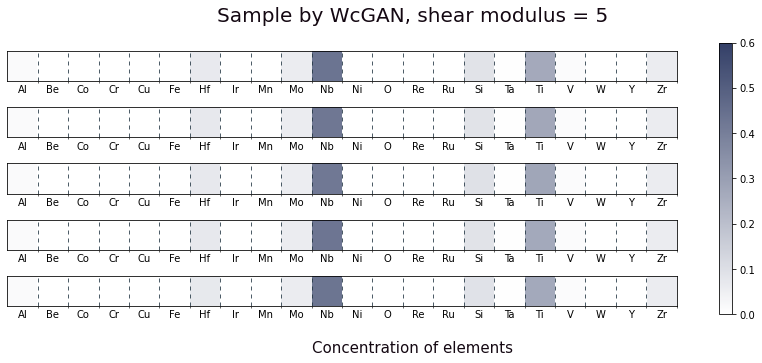

In [28]:
R_WcGAN_sample,R_WcGAN_conds = vg_GAN.g_sample(100,[30,8])

I = 10
R_WcGAN = plotting.sample_plot(R_WcGAN_sample,dset,title = "Sample by WcGAN, shear modulus = 5",interval = I)
for i in range(5):
    print(R_WcGAN_conds[I*i])

## Inerpolation plots fixed conds

### cAE

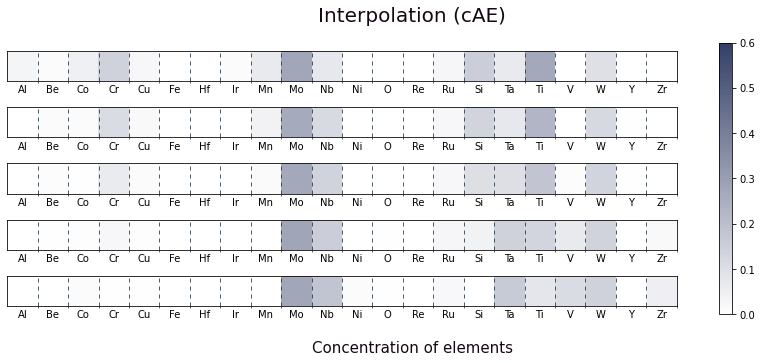

In [30]:
Interpo_cAE_sample_fc,Interpo_cAE_conds_fc=vg_cAE.preprocess_interpolation_AE_fixed_conds([60,15])
Interpo_cAE_fc = plotting.sample_plot(Interpo_cAE_sample_fc,dset,title = "Interpolation (cAE)")

### cVAE

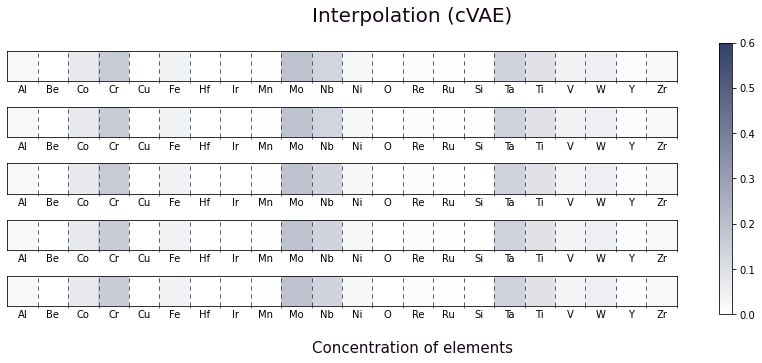

In [31]:
Interpo_cVAE_sample_fc,Interpo_cVAE_conds_fc=vg_cVAE.preprocess_interpolation_AE_fixed_conds([60,15])
Interpo_cVAE_fc = plotting.sample_plot(Interpo_cVAE_sample_fc,dset,title="Interpolation (cVAE)")

### WcGAN

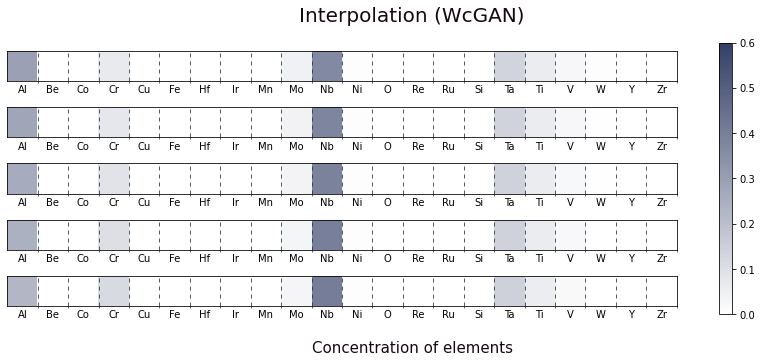

In [29]:
Interpo_WcGAN_sample_fc,Interpo_WcGAN_conds_fc=vg_GAN.preprocess_interpolation_GAN_fixed_conds([60,15])
Interpo_WcGAN_fc = plotting.sample_plot(Interpo_WcGAN_sample_fc,dset,title = "Interpolation (WcGAN)")